In [3]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df=pd.read_csv(r"https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day30-function-transformer/train.csv",usecols=["Age","Fare","Survived"])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\cchap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


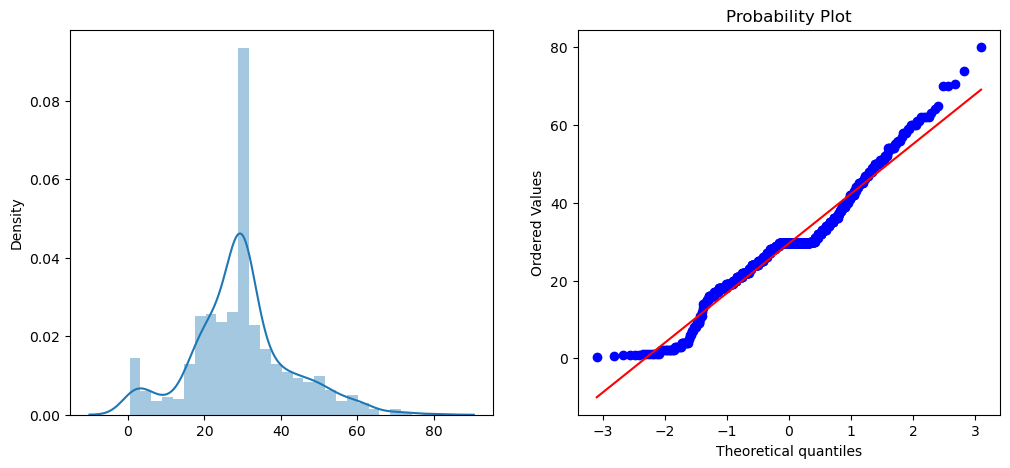

In [29]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.distplot(x=x_train["Age"],ax=ax1)

stats.probplot(x_train["Age"],plot=ax2)
plt.show()

C:\Users\cchap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


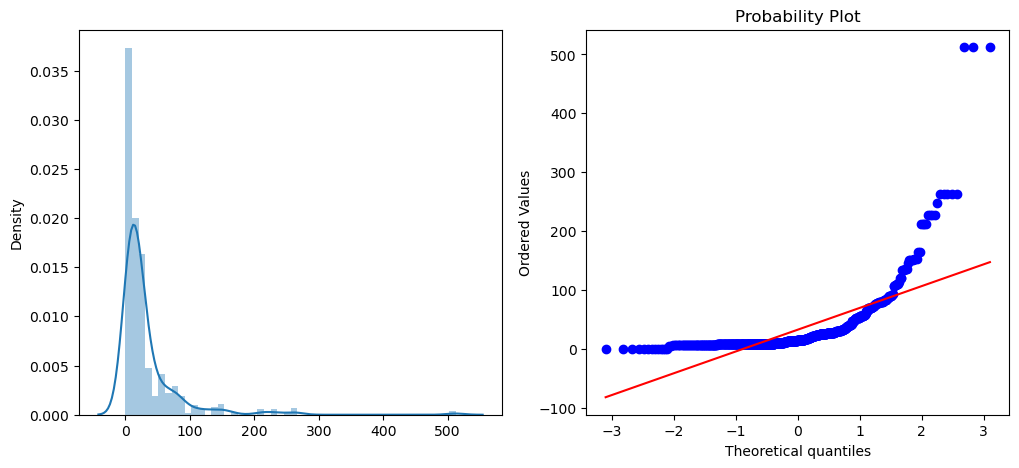

In [31]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.distplot(x=x_train["Fare"],ax=ax1)

stats.probplot(x_train["Fare"],plot=ax2)
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression

In [36]:
## without using Any transformer

In [37]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [38]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)

print("Accuracy score of LR ={}".format(accuracy_score(y_test,y_pred1)))
print("Accuracy score of DT ={}".format(accuracy_score(y_test,y_pred2)))

Accuracy score of LR =0.6480446927374302
Accuracy score of DT =0.6815642458100558


In [47]:
trf=FunctionTransformer(func=np.log1p)

In [48]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

In [49]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred1=clf1.predict(x_test_transformed)
y_pred2=clf2.predict(x_test_transformed)

print("Accuracy score of LR ={}".format(accuracy_score(y_test,y_pred1)))
print("Accuracy score of DT ={}".format(accuracy_score(y_test,y_pred2)))

Accuracy score of LR =0.6815642458100558
Accuracy score of DT =0.664804469273743


In [50]:
x_transformed=trf.fit_transform(x)

In [51]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

print("LR ",np.mean(cross_val_score(clf,x_transformed,y,scoring="accuracy",cv=10)))
print("DT ",np.mean(cross_val_score(clf1,x_transformed,y,scoring="accuracy",cv=10)))

LR  0.678027465667915
DT  0.653258426966292


## age before log transform and after Log transform (QQ plot)

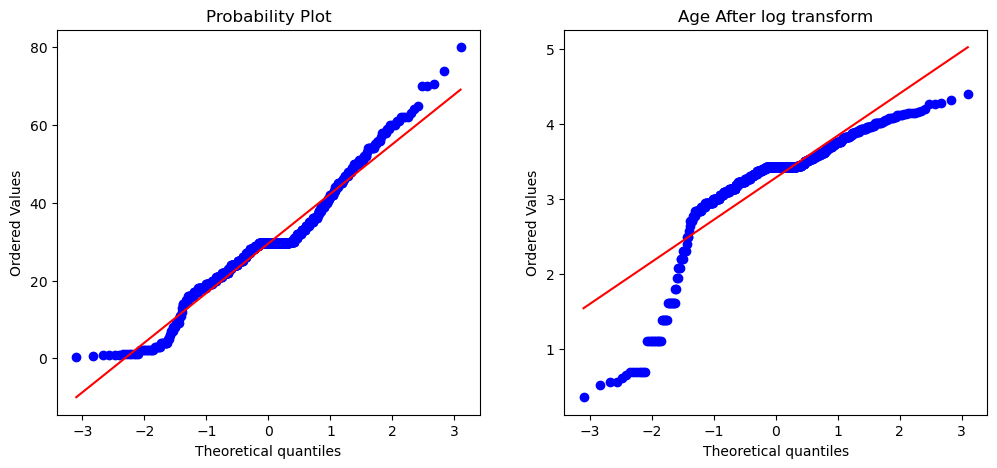

In [55]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
plt.title("Age Before log transform")
stats.probplot(x_train["Age"],plot=ax1)

stats.probplot(x_train_transformed["Age"],plot=ax2)
plt.title("Age After log transform")
plt.show()


In [57]:
x_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


## Fare before log transform and after Log transform (QQ plot)

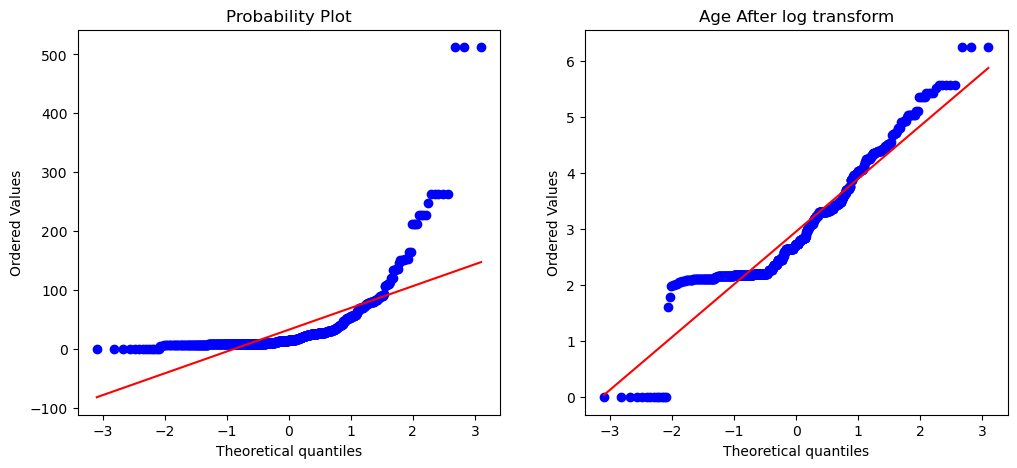

In [56]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
plt.title("Age Before log transform")
stats.probplot(x_train["Fare"],plot=ax1)

stats.probplot(x_train_transformed["Fare"],plot=ax2)
plt.title("Age After log transform")
plt.show()


In [58]:
trf2=ColumnTransformer([("logTransformer",FunctionTransformer(np.log1p),[1])],remainder="passthrough")

x_train_transformed2=trf2.fit_transform(x_train)
x_test_transformed2=trf2.transform(x_test)

In [59]:
lo=LogisticRegression()
dt=DecisionTreeClassifier()

In [62]:
lo.fit(x_train_transformed2,y_train)

LogisticRegression()

In [63]:
dt.fit(x_train_transformed2,y_train)

DecisionTreeClassifier()

In [65]:
y_pred_lo=lo.predict(x_test_transformed2)
y_pred_dt=dt.predict(x_test_transformed2)

print("Lo accuracy ={}".format(accuracy_score(y_test,y_pred_lo)))
print("Dt accuracy ={}".format(accuracy_score(y_test,y_pred_dt)))

Lo accuracy =0.6703910614525139
Dt accuracy =0.6759776536312849


In [70]:
x_transformed2=trf2.fit_transform(x)

clf=LogisticRegression()
clf1=DecisionTreeClassifier()

print("LR ",np.mean(cross_val_score(clf,x_transformed2,y,scoring="accuracy",cv=10)))
print("DT ",np.mean(cross_val_score(clf1,x_transformed2,y,scoring="accuracy",cv=10)))

LR  0.6712609238451936
DT  0.6633208489388265


In [112]:
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [117]:
def applyTransform(transform):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    trf=ColumnTransformer([("Log",FunctionTransformer(transform),[1])],remainder="passthrough")
    
    lo=LogisticRegression()
    dt=DecisionTreeClassifier()
    
    x_trans=trf.fit_transform(x)
    
    print("Accuracy for logistic ",np.mean(cross_val_score(lo,x_trans,y,scoring="accuracy",cv=10)))
    print("Accuracy for Decision",np.mean(cross_val_score(dt,x_trans,y,scoring="accuracy",cv=10)))
    
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
    plt.title("Before transformed  for Fare")
    stats.probplot(x["Fare"],plot=ax1)    
    
    stats.probplot(x_trans[:,0],plot=ax2)
    plt.title("After Transformed for Fare")
    plt.show()


Accuracy for logistic  0.6442446941323345
Accuracy for Decision 0.6554681647940075


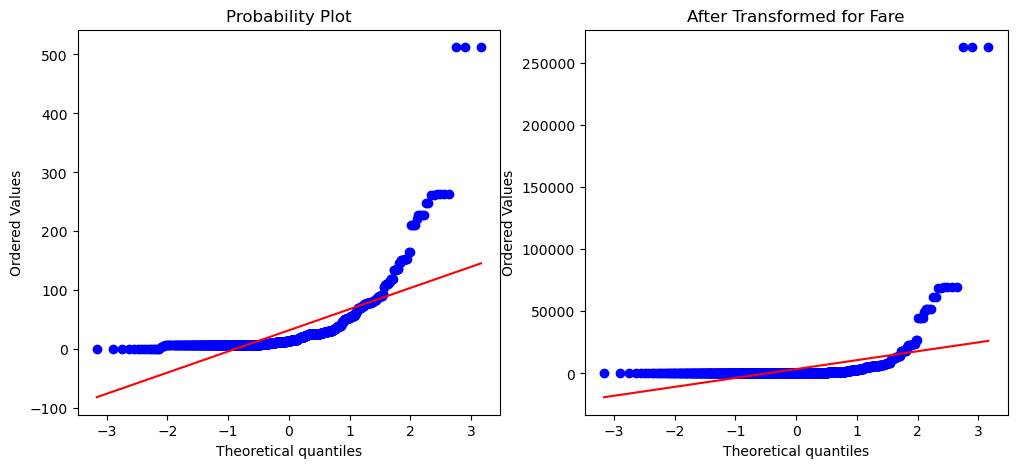

In [121]:
applyTransform(lambda x:x**2)